<a href="https://colab.research.google.com/github/zerualem/pi-project/blob/master/PI_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering of PI data

## Import data

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
%cd My\ Drive/PIPM_Data_R_code/Analysis

/gdrive/My Drive/PIPM_Data_R_code/Analysis


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
data_scaled = pd.read_csv("full_data_dmy_mm.csv")

In [5]:
data_scaled.shape

(27574, 252)

In [0]:
data_scaled.columns.to_list()

## Kmeans and hierarchical clustering

In [0]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
X = data_scaled.drop(columns='pi')

### Check cluster quality for different cluster numbers

In [24]:
%%time
for k in range(2,9):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
  agglo = AgglomerativeClustering(n_clusters=k).fit(X)
  klabels = kmeans.labels_
  aglabels = agglo.labels_

  print(f" For {k} and kmeans: {silhouette_score(X, klabels, metric='sqeuclidean')}")
  print(f" For {k} and Agglomerative: {silhouette_score(X, aglabels, metric='sqeuclidean')}")

 For 2 and kmeans: 0.1796353575337861
 For 2 and Agglomerative: 0.19200841872295898
 For 3 and kmeans: 0.1102825429455676
 For 3 and Agglomerative: 0.19310649950840997
 For 4 and kmeans: 0.10849199196203804
 For 4 and Agglomerative: 0.0920085262203645
 For 5 and kmeans: 0.09888418417853079
 For 5 and Agglomerative: 0.0802588471449577
 For 6 and kmeans: 0.07183767742503759
 For 6 and Agglomerative: 0.009332822552374203
 For 7 and kmeans: 0.07773324446514765
 For 7 and Agglomerative: -0.020171207233560806
 For 8 and kmeans: 0.0736296034699714
 For 8 and Agglomerative: -0.013945399131847808
CPU times: user 1h 5min 2s, sys: 16.1 s, total: 1h 5min 18s
Wall time: 1h 5min 6s


### Generate three clusters using kmeans and hierarchical (agglomeritive)  clustering

In [14]:
%%time
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
agglo = AgglomerativeClustering(n_clusters=3).fit(X)
klabels = kmeans.labels_
aglabels = agglo.labels_

CPU times: user 3min 33s, sys: 5.78 s, total: 3min 39s
Wall time: 3min 38s


### Reduce dimension for visualization using PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pcs = pca.fit_transform(X)
pcdf = pd.DataFrame(data = pcs
             , columns = ['PC1', 'PC2','PC3'])
pcCdf = pd.concat([pcdf, data_scaled['pi']], axis=1)
pcdf['klabels']=klabels
pcdf['aglabels'] = aglabels
pcdf.shape

(27574, 5)

In [16]:
pca.explained_variance_ratio_

array([0.12188796, 0.06896948, 0.0453697 ])

In [17]:
pcdf.head()

,PC1,PC2,PC3,klabels,aglabels
0,-0.889206,0.059627,0.633557,1,0
1,-0.317943,0.275804,0.696709,1,0
2,-0.366348,1.634464,1.032684,1,2
3,-1.074810,-0.084938,0.934383,1,0
4,-1.092718,0.125293,-0.082274,1,0


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pcdf['klabels'],pcdf['aglabels'])

array([[  912,  3606,  2318],
       [10583,   387,   371],
       [ 7685,  1629,    83]])

### Kmeans clustering with three clusters

In [20]:
import plotly.express as px

fig = px.scatter_3d(pcdf, x='PC1', y='PC2', z='PC3',
              color='klabels', opacity=0.7)
fig.show()

### Hierarchical clustering with three clusters

In [21]:
fig = px.scatter_3d(pcdf, x='PC1', y='PC2', z='PC3',
              color='aglabels', opacity=0.7)
fig.show()

In [12]:
%%time
from sklearn.cluster import FeatureAgglomeration
f_agglo = FeatureAgglomeration(n_clusters=32)
f_agglo.fit(X) 
X_reduced = f_agglo.transform(X)
print(X_reduced.shape)

(27574, 32)
CPU times: user 1.92 s, sys: 125 ms, total: 2.04 s
Wall time: 2.05 s


In [0]:
mr = {0:'x',1:'v'}
mrk = PCdf['pi'].apply(lambda x:mr[x]).values

In [0]:
clr = ['red','blue']

### Kmeans with two clusters

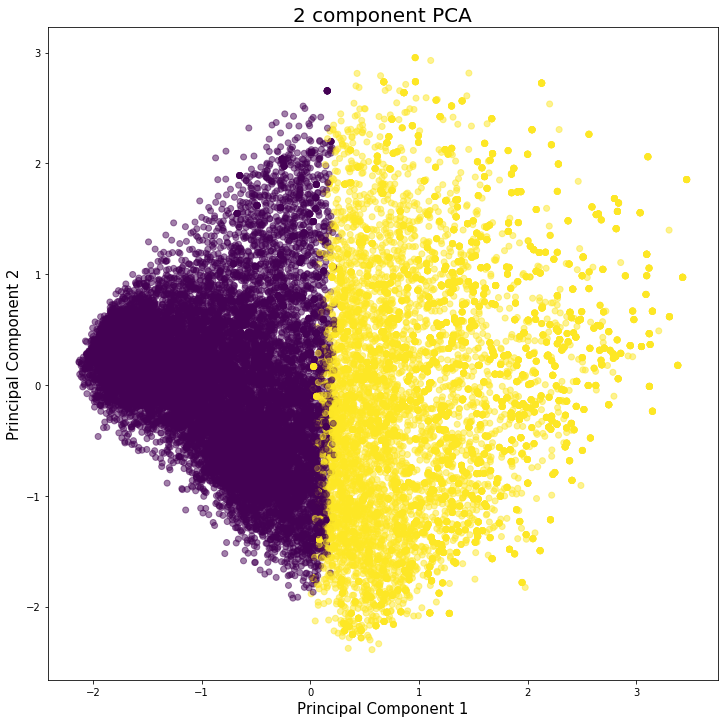

In [23]:
fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(x='PC1', y='PC2', c='klabels', alpha=0.5, data=PCdf)